<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
train = pd.read_csv('/kaggle/input/fis-pt012120-mod2-project-warmup/train.csv')
test = pd.read_csv('/kaggle/input/fis-pt012120-mod2-project-warmup/test.csv')

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [5]:
train.head(10)

,id,host_id,host_name,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,33400953,3400827,Nicole,40.79595,-73.97485,Entire home/apt,3,2,2019-04-21,0.74,1,0,380
1,16965705,3483600,Joshua,40.83498,-73.94214,Private room,2,0,NaN,NaN,1,0,63
2,34819184,156850005,Sharon,40.75600,-73.87756,Private room,1,1,2019-05-29,0.73,2,355,77
3,22579551,3231509,Annamaria,40.71775,-74.00607,Entire home/apt,14,13,2019-05-08,0.77,4,365,450
4,14571451,32454701,Maria,40.72824,-73.97824,Entire home/apt,1,198,2019-07-06,5.63,1,21,129
5,23630216,51969502,Jenny,40.72890,-73.98865,Private room,3,1,2018-03-16,0.06,1,0,53
6,9866779,50680795,Sierra,40.82976,-73.94663,Private room,8,1,2016-01-02,0.02,1,0,30
7,26555992,552288,Charles,40.69949,-73.92383,Entire home/apt,2,6,2019-06-26,0.54,1,0,65
8,35459559,46672441,Vivian,40.74880,-73.82191,Private room,3,0,NaN,NaN,1,90,70
9,30937759,219517861,Sonder (NYC),40.74846,-73.97611,Entire home/apt,2,5,2019-05-18,0.99,327,62,263


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31292 entries, 0 to 31291
Data columns (total 13 columns):
id                                31292 non-null int64
host_id                           31292 non-null int64
host_name                         31280 non-null object
latitude                          31292 non-null float64
longitude                         31292 non-null float64
room_type                         31292 non-null object
minimum_nights                    31292 non-null int64
number_of_reviews                 31292 non-null int64
last_review                       24808 non-null object
reviews_per_month                 24808 non-null float64
calculated_host_listings_count    31292 non-null int64
availability_365                  31292 non-null int64
price                             31292 non-null int64
dtypes: float64(3), int64(7), object(3)
memory usage: 3.1+ MB


In [7]:
train.describe()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
count,3.129200e+04,3.129200e+04,31292.000000,31292.000000,31292.000000,31292.000000,24808.000000,31292.000000,31292.000000,31292.000000
mean,1.899889e+07,6.748342e+07,40.728825,-73.952114,6.965007,23.110252,1.374539,7.119296,112.092707,151.122907
std,1.096554e+07,7.844970e+07,0.054357,0.046041,19.364565,43.744640,1.709655,32.915889,131.542545,221.579760
min,2.539000e+03,2.438000e+03,40.506410,-74.230590,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,9.464590e+06,7.727013e+06,40.689917,-73.983050,1.000000,1.000000,0.190000,1.000000,0.000000,69.000000
50%,1.967592e+07,3.091863e+07,40.722925,-73.955720,3.000000,5.000000,0.710000,1.000000,43.000000,105.000000
75%,2.905940e+07,1.074344e+08,40.762890,-73.936150,5.000000,24.000000,2.020000,2.000000,225.000000,175.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,1250.000000,629.000000,58.500000,327.000000,365.000000,10000.000000


In [8]:
#train = train.drop(['latitude', 'longitude', 'id', 'host_id', 'host_name'], axis=1)

In [9]:
train.price.describe()

count    31292.000000
mean       151.122907
std        221.579760
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [10]:
train.price.isna().sum()

0

In [11]:
train.loc[train.price == 0.00]

,id,host_id,host_name,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
2695,20933849,13709292,Qiuchi,40.75091,-73.97597,Entire home/apt,3,0,NaN,NaN,1,0,0
2873,20523843,15787004,Martial Loft,40.69467,-73.92433,Private room,2,16,2019-05-18,0.71,5,0,0
3872,20608117,1641537,Lauren,40.72462,-73.94072,Private room,2,12,2017-10-27,0.53,2,0,0
10239,21291569,101970559,Sergii,40.69211,-73.90670,Shared room,30,2,2019-06-22,0.11,6,333,0
15350,20639628,86327101,Adeyemi,40.68173,-73.91342,Private room,1,93,2019-06-15,4.28,6,176,0
24713,20333471,131697576,Anisha,40.83296,-73.88668,Private room,2,55,2019-06-24,2.56,4,127,0
25830,21304320,101970559,Sergii,40.69166,-73.90928,Shared room,30,5,2019-05-24,0.26,6,139,0
28223,18750597,8993084,Kimberly,40.69023,-73.95428,Private room,4,1,2018-01-06,0.05,4,28,0


In [12]:
train.drop(train[train['price']== 0.00].index, inplace=True)

In [13]:
train.isna().sum()

id                                   0
host_id                              0
host_name                           12
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       6483
reviews_per_month                 6483
calculated_host_listings_count       0
availability_365                     0
price                                0
dtype: int64

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31284 entries, 0 to 31291
Data columns (total 13 columns):
id                                31284 non-null int64
host_id                           31284 non-null int64
host_name                         31272 non-null object
latitude                          31284 non-null float64
longitude                         31284 non-null float64
room_type                         31284 non-null object
minimum_nights                    31284 non-null int64
number_of_reviews                 31284 non-null int64
last_review                       24801 non-null object
reviews_per_month                 24801 non-null float64
calculated_host_listings_count    31284 non-null int64
availability_365                  31284 non-null int64
price                             31284 non-null int64
dtypes: float64(3), int64(7), object(3)
memory usage: 3.3+ MB


In [15]:
continuous = ['minimum_nights ', 'number_of_reviews ', 'calculated_host_listings_count ', 'availability_365 ']
categoricals =  ['room_type']

Skew is: 16.825762905141794


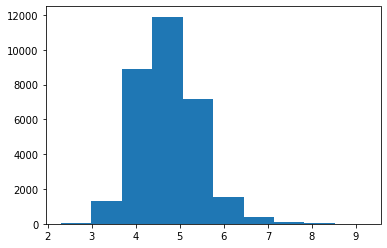

In [16]:
import numpy as np
price_train = train['price']
price_log = np.log(price_train)

print ("Skew is:", train.price.skew())
plt.hist(price_log)
plt.show()

In [17]:
train.duplicated().sum()

0

In [18]:
df = train.drop(['latitude', 'longitude', 'id', 'host_id', 'host_name', 'last_review', 'reviews_per_month', 'price'], axis=1)
display(df.head())



,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Entire home/apt,3,2,1,0
1,Private room,2,0,1,0
2,Private room,1,1,2,355
3,Entire home/apt,14,13,4,365
4,Entire home/apt,1,198,1,21


In [118]:
test_X = test.drop(['latitude', 'longitude', 'id', 'host_id', 'host_name', 'last_review', 'reviews_per_month',], axis=1)
display(test_X.head())


,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Entire home/apt,3,26,3,341
1,Entire home/apt,30,5,1,333
2,Entire home/apt,5,0,1,0
3,Entire home/apt,31,5,1,219
4,Entire home/apt,1,21,1,82


In [19]:
y = train['price']
display(y.head())

0    380
1     63
2     77
3    450
4    129
Name: price, dtype: int64

In [20]:
dummies = pd.get_dummies(df['room_type'], prefix=categoricals, drop_first=True)



X = pd.concat([df, dummies], axis=1)
X = X.drop(['room_type'], axis=1)

X.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,['room_type']_Private room,['room_type']_Shared room
0,3,2,1,0,0,0
1,2,0,1,0,1,0
2,1,1,2,355,1,0
3,14,13,4,365,0,0
4,1,198,1,21,0,0


In [131]:
test_dummies = pd.get_dummies(test_X['room_type'], prefix=categoricals, drop_first=True)
X_final = pd.concat([test_X, test_dummies], axis=1)
X_final = X_final.drop(['room_type'], axis=1)
X_final = X_final.drop(X_final.columns[-1], axis=1)
X_final.head(40)

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,['room_type']_Private room
0,3,26,3,341,0
1,30,5,1,333,0
2,5,0,1,0,0
3,31,5,1,219,0
4,1,21,1,82,0
5,1,2,5,90,1
6,1,102,1,348,1
7,1,66,1,365,0
8,1,78,2,116,1
9,5,28,2,0,1


In [132]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824 entries, 0 to 7823
Data columns (total 5 columns):
minimum_nights                    7824 non-null int64
number_of_reviews                 7824 non-null int64
calculated_host_listings_count    7824 non-null int64
availability_365                  7824 non-null int64
['room_type']_Private room        7824 non-null uint8
dtypes: int64(4), uint8(1)
memory usage: 252.3 KB


In [133]:
X_final.isnull().values.any()


False

In [134]:
X = X.drop(X.columns[-1], axis=1)

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [94]:
features = X_train
labels = y_train

In [95]:
X_train.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,['room_type']_Private room
16654,1,0,1,0,1
2385,3,1,2,36,1
17676,1,2,1,341,1
7193,7,1,2,150,0
19823,3,26,1,15,0


In [96]:
from sklearn.linear_model import LinearRegression

my_model = LinearRegression()
my_model.fit(features, labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
from sklearn.metrics import mean_squared_error

predictions = my_model.predict(features)
mse = mean_squared_error(labels, predictions)
rmse = np.sqrt(mse)

print(rmse)

204.78204610980353


In [98]:
display(my_model.coef_)

array([-7.74973874e-02, -3.25781617e-01,  6.42903811e-02,  1.62924413e-01,
       -1.15393576e+02])

In [99]:
display(my_model.intercept_)

193.96159082749756

In [100]:
my_model.coef_.reshape(-1,1)

array([[-7.74973874e-02],
       [-3.25781617e-01],
       [ 6.42903811e-02],
       [ 1.62924413e-01],
       [-1.15393576e+02]])

In [101]:
pd.DataFrame(data=my_model.coef_.reshape(1, -1), columns=features.columns)

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,['room_type']_Private room
0,-0.077497,-0.325782,0.06429,0.162924,-115.393576


In [102]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
            my_model, 
            features,
            labels,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([244.28679281, 234.37875057, 180.54125795, 187.90177505,
       164.31117681, 243.26500229, 202.10350606, 146.55602638,
       190.04936554, 229.01280554])

202.24064589982964

32.50387184027227

In [103]:
y.std()

221.59490965154006

In [104]:
from statsmodels.formula.api import ols

In [105]:
y_values = y.values
X_values = X.values

In [106]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31284 entries, 0 to 31291
Data columns (total 5 columns):
minimum_nights                    31284 non-null int64
number_of_reviews                 31284 non-null int64
calculated_host_listings_count    31284 non-null int64
availability_365                  31284 non-null int64
['room_type']_Private room        31284 non-null uint8
dtypes: int64(4), uint8(1)
memory usage: 1.2 MB


In [108]:
import statsmodels.api as sm
df_inter_sm = sm.add_constant(final)
model = sm.OLS(y,final)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.190
Model:                            OLS   Adj. R-squared (uncentered):              0.190
Method:                 Least Squares   F-statistic:                              1469.
Date:                Sun, 26 Apr 2020   Prob (F-statistic):                        0.00
Time:                        15:13:45   Log-Likelihood:                     -2.1603e+05
No. Observations:               31284   AIC:                                  4.321e+05
Df Residuals:                   31279   BIC:                                  4.321e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
minimum_nights                     1.2591      0.071     17.787      0.000       1.120       1.398
number_of_reviews                  0.3573      0.031     11.493      0.000       0.296       0.418
calculated_host_listings_count     0.3808      0.043      8.828      0.000       0.296       0.465
availability_365                   0.5017      0.010     49.615      0.000       0.482       0.522
['room_type']_Private room        18.1483      2.276      7.975      0.000      13.688      22.609
==============================================================================
Omnibus:                    59013.747   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        206754619.870
Skew:                          14.225   Prob(JB):                         0.00
Kurtosis:                     400.248   Cond. No.                         291.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
X_test.shape

(6257, 5)

In [110]:
y_hat = my_model.predict(X_test)
y_hat

array([100.97445441, 192.98683104, 179.86893062, ..., 216.30254601,
       203.74783917,  78.55480752])

In [135]:
y_hat2 = my_model.predict(X_final)

In [140]:
test_price = pd.Series(y_hat2)

In [143]:
features_test = X_final
labels_test = test_price

In [141]:
df_predictions = pd.concat([X_final, test_price], axis=1)

In [146]:
df_predictions.shape

(7824, 6)

In [144]:
from sklearn.model_selection import cross_val_score

scores_test = cross_val_score(
            my_model, 
            features_test,
            labels_test,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores_test = np.sqrt(-scores)
display(rmse_scores_test)
display(rmse_scores_test.mean())
display(rmse_scores_test.std())

array([244.28679281, 234.37875057, 180.54125795, 187.90177505,
       164.31117681, 243.26500229, 202.10350606, 146.55602638,
       190.04936554, 229.01280554])

202.24064589982964

32.50387184027227

In [111]:
y_hat.shape

(6257,)

In [112]:
residuals = y_hat - y_test
residuals.head(25)

2471     -38.025546
15572     -7.013169
15932      5.868931
31214   -122.533698
641      -74.729423
10154     26.522620
937       60.700016
29264    -22.278165
29342     13.074031
14904     -6.842382
1207     132.189815
8913      75.345136
20843    -27.745227
18388     -2.353476
1381      71.732370
3257      63.948384
15373     78.446787
20310   -156.403812
10830     26.424910
4183     132.492087
13350    -29.343345
10247     72.680957
30284     48.835497
5366      46.528710
26704     70.535291
Name: price, dtype: float64

In [115]:
residuals.shape

(6257,)

In [116]:
test.shape

(7824, 12)

In [113]:
import joblib

joblib.dump(my_model, "my_model.pkl")

['my_model.pkl']

In [114]:
# Load the model from earlier
my_model_loaded = joblib.load("my_model.pkl")